In [ ]:
# Core tools for ASR, Diarization, NLP, and audio analysis
!pip install yt-dlp whisper transformers torch librosa soundfile pydub --quiet
!pip install pyannote.audio --quiet


# Core tools for ASR, Diarization, NLP, and Audio Analysis

```python
# Install youtube-dl fork (yt-dlp) for downloading audio/video content
# Install whisper (OpenAI's Automatic Speech Recognition model for speech-to-text)
# Install transformers (Hugging Face library for NLP models like summarization, translation, etc.)
# Install torch (PyTorch backend required for deep learning models)
# Install librosa (used for audio feature extraction and analysis)
# Install soundfile (for reading and writing audio files)
# Install pydub (for audio manipulation: cutting, merging, format conversion)
!pip install yt-dlp whisper transformers torch librosa soundfile pydub --quiet

# Install pyannote.audio (library for speaker diarization, speaker embedding, and related tasks)
!pip install pyannote.audio --quiet


This block uses **yt-dlp** to download audio from a YouTube video.

- `url` defines the YouTube video link.
- `output_file` sets the desired filename for the extracted audio.
- `ydl_opts` is a dictionary of options for `yt-dlp`:
  - `'format': 'bestaudio/best'` → fetch the best available audio quality.
  - `'outtmpl': 'sales_call.mp3'` → save the audio file as `sales_call.mp3`.
  - `'quiet': False` → display progress and logs during download.
  - `'postprocessors'` → after downloading, use **FFmpeg** to extract audio:
    - Convert to `mp3` format.
    - Set audio quality to **192 kbps**.
  - `'keepvideo': True` → retain the original video to avoid filename conflicts.
- The `with yt_dlp.YoutubeDL(ydl_opts)` block executes the download process.
- After downloading, `os.path.exists` checks if the file was successfully created.
- If successful, it prints the file size; otherwise, it logs an error message.


In [ ]:
import os
import yt_dlp

url = "https://www.youtube.com/watch?v=4ostqJD3Psc"
output_file = "sales_call.mp3"
ydl_opts = {
    'format': 'bestaudio/best',
    'outtmpl': 'sales_call.mp3',
    'quiet': False,
    'postprocessors': [{
        'key': 'FFmpegExtractAudio',
        'preferredcodec': 'mp3',
        'preferredquality': '192',
    }],
    'keepvideo': True  # Prevent deleting original to avoid filename confusion
}

# Attempt download and print file size after
with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    ydl.download([url])

print("Download complete?", os.path.exists(output_file))
if os.path.exists(output_file):
    print("File size:", os.path.getsize(output_file))
else:
    print("ERROR: Audio file not downloaded. Check yt-dlp output above.")


[youtube] Extracting URL: https://www.youtube.com/watch?v=4ostqJD3Psc
[youtube] 4ostqJD3Psc: Downloading webpage
[youtube] 4ostqJD3Psc: Downloading tv simply player API JSON
[youtube] 4ostqJD3Psc: Downloading tv client config
[youtube] 4ostqJD3Psc: Downloading tv player API JSON
[info] 4ostqJD3Psc: Downloading 1 format(s): 251
[download] sales_call.mp3 has already been downloaded
[download] 100% of    1.99MiB
[ExtractAudio] Destination: sales_call.mp3
Download complete? True
File size: 2946285


This block uses **pydub** to convert an MP3 audio file to WAV format for further analysis.

- `from pydub import AudioSegment` → imports the main class for audio manipulation.
- `AudioSegment.from_mp3("sales_call.mp3")` → loads the MP3 file into an `AudioSegment` object.
- `wav_output = "sales_call.wav"` → sets the output filename for the WAV file.
- `audio.export(wav_output, format="wav")` → exports/converts the audio to WAV format.


In [ ]:
from pydub import AudioSegment
# Convert to WAV for analysis
audio = AudioSegment.from_mp3("sales_call.mp3")
wav_output = "sales_call.wav"
audio.export(wav_output, format="wav")


<_io.BufferedRandom name='sales_call.wav'>

In [ ]:
!pip uninstall -y whisper
!pip install git+https://github.com/openai/whisper.git


Found existing installation: whisper 1.1.10
Uninstalling whisper-1.1.10:
  Successfully uninstalled whisper-1.1.10
  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-jy3raybl
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-jy3raybl
  Resolved https://github.com/openai/whisper.git to commit c0d2f624c09dc18e709e37c2ad90c039a4eb72a2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for openai-whisper: filename=openai_whisper-20250625-py3-none-any.whl size=803979 sha256=b98b1313c0082875ec4cd6257cd2f352173cf96f6a3fe41239ede38d5c5beafe
  Stored in directory: /tmp/pip-ephem-wheel-cache-6ozqty34/wheels/c3/03/25/5e0ba78bc27a3a089f137c9f1d92fdfce16d06996c071a016c
Successfully built openai-whisper


This block uses **OpenAI Whisper** to transcribe audio into text and extract time-stamped segments.

- `import whisper` → imports the Whisper library for automatic speech recognition (ASR).
- `model = whisper.load_model("small")` → loads the small Whisper model (faster, moderate accuracy).
- `result = model.transcribe(wav_output)` → transcribes the WAV audio file and returns a dictionary containing the transcript and segment details.
- `transcript = result["text"]` → extracts the full transcribed text.
- `segments = result["segments"]` → extracts a list of time-stamped segments, each containing start/end times and the corresponding spoken text.


In [ ]:
import whisper

model = whisper.load_model("small")
result = model.transcribe(wav_output)
transcript = result["text"]
segments = result["segments"]


This block uses **PyAnnote Audio** to perform speaker diarization (identifying who speaks when) on the audio.

- `from pyannote.audio import Pipeline` → imports the pipeline class for audio processing tasks like diarization.
- `HUG_AUTH_TOKEN = "..."` → your Hugging Face authentication token required to access pretrained models.
- `Pipeline.from_pretrained("pyannote/speaker-diarization-3.1", use_auth_token=HUG_AUTH_TOKEN)` → loads the pretrained speaker diarization model version 3.1.
- `diarization = pipeline(wav_output)` → applies the diarization model to the WAV file, producing speaker segments with start/end times.
- The `for` loop iterates over the diarization output using `itertracks(yield_label=True)`:
  - Extracts `start` and `end` times for each speaker segment.
  - Extracts the `speaker` label.
  - Appends a dictionary for each turn with `{'start': turn.start, 'end': turn.end, 'speaker': str(speaker)}` for further analysis.


In [ ]:
from pyannote.audio import Pipeline

# You will need a free HuggingFace token: https://hf.co/settings/tokens
HUG_AUTH_TOKEN = "HUG_AUTH_TOKEN "

pipeline = Pipeline.from_pretrained(
    "pyannote/speaker-diarization-3.1",
    use_auth_token=HUG_AUTH_TOKEN
)
diarization = pipeline(wav_output)

# Create turns per speaker for analysis
diarization_turns = []
for turn, _, speaker in diarization.itertracks(yield_label=True):
    diarization_turns.append({'start': turn.start, 'end': turn.end, 'speaker': str(speaker)})


pytorch_model.bin:   0%|          | 0.00/5.91M [00:00<?, ?B/s]

config.yaml:   0%|          | 0.00/399 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/26.6M [00:00<?, ?B/s]

config.yaml:   0%|          | 0.00/221 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/pyannote/audio/models/blocks/pooling.py:104: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at /pytorch/aten/src/ATen/native/ReduceOps.cpp:1839.)
  std = sequences.std(dim=-1, correction=1)
/usr/local/lib/python3.12/dist-packages/pyannote/audio/core/io.py:85: UserWarning: torchaudio._backend.utils.info has been

This block matches each transcribed segment to the most likely speaker using the diarization results.

- `import numpy as np` → imports NumPy (not strictly needed here, but useful for numerical operations if needed later).
- `assign_speaker(segment, diarization_turns)` → a helper function that assigns a speaker to a segment:
  - Calculates the midpoint of the segment: `mid = (segment['start'] + segment['end']) / 2`.
  - Iterates over all `diarization_turns` and checks which turn contains the midpoint.
  - Returns the corresponding speaker label. If no match is found, returns `"Unknown"`.
- The `utterances` list is created by iterating over all `segments` from Whisper:
  - Calls `assign_speaker` for each segment to determine the speaker.
  - Appends a dictionary with `'text'`, `'start'`, `'end'`, and `'speaker'` for each utterance.
- Result: `utterances` now contains time-stamped, speaker-attributed transcript segments ready for analysis.


In [ ]:
import numpy as np
# Assign most likely speaker to each segment by matching times
def assign_speaker(segment, diarization_turns):
    mid = (segment['start'] + segment['end']) / 2
    for turn in diarization_turns:
        if turn['start'] <= mid <= turn['end']:
            return turn['speaker']
    return "Unknown"

utterances = []
for seg in segments:
    speaker = assign_speaker(seg, diarization_turns)
    utterances.append({'text': seg['text'], 'start': seg['start'], 'end': seg['end'], 'speaker': speaker})


This block calculates **talk-time ratios** and identifies the **longest monologue** per speaker.

- `from collections import defaultdict` → imports a dictionary that returns a default value for missing keys.
- `talk_times = defaultdict(float)` → stores cumulative speaking time for each speaker.
- `monologues = defaultdict(float)` → stores the duration of the longest single speech (monologue) per speaker.
- The `for utt in utterances` loop:
  - Computes the duration of each utterance: `duration = utt['end'] - utt['start']`.
  - Adds the duration to the speaker’s total in `talk_times`.
  - Updates `monologues` if this utterance is longer than the previous longest.
- `total_time = segments[-1]['end'] - segments[0]['start']` → computes total audio duration from the first segment start to last segment end.
- `ratios = {spk: round(100 * t / total_time, 2) for spk, t in talk_times.items()}` → calculates each speaker’s talk-time as a percentage of the total audio.
- `print("Talk-time Ratios (%):", ratios)` → shows the percentage of time each speaker talked.
- `print("Longest Monologue (sec):", monologues)` → shows the duration of the longest single speech for each speaker.


In [ ]:
from collections import defaultdict

talk_times = defaultdict(float)
monologues = defaultdict(float)

for utt in utterances:
    duration = utt['end'] - utt['start']
    talk_times[utt['speaker']] += duration
    monologues[utt['speaker']] = max(monologues[utt['speaker']], duration)

# Fix: Use 0 for first element instead of 'start'
total_time = segments[-1]['end'] - segments[0]['start']

ratios = {spk: round(100 * t / total_time, 2) for spk, t in talk_times.items()}

print("Talk-time Ratios (%):", ratios)
print("Longest Monologue (sec):", monologues)


Talk-time Ratios (%): {'Unknown': 10.89, 'SPEAKER_00': 53.28, 'SPEAKER_01': 35.84}
Longest Monologue (sec): defaultdict(<class 'float'>, {'Unknown': 9.36, 'SPEAKER_00': 5.439999999999998, 'SPEAKER_01': 4.440000000000001})


This block detects **questions** in the transcript and counts how many each speaker asked.

- `from transformers import pipeline` → imports Hugging Face pipeline for NLP tasks.
- `nlp = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")` → loads a sentiment analysis model (not directly used for question detection here, could be used later for sentiment of questions/answers).
- `is_question(text)` → helper function to identify questions:
  - Checks if the text contains a `?`.
  - Checks if the text starts with common interrogative words like `what`, `how`, `why`, `when`, `where`, `which`, `who`, `whom`, `whose`.
- `questions = defaultdict(int)` → initializes a counter for questions per speaker.
- The `for utt in utterances` loop:
  - Calls `is_question` on each utterance.
  - If true, increments the count for the corresponding speaker.
- `print("Questions Asked: ", dict(questions))` → displays the total number of questions asked by each speaker.


In [ ]:
from transformers import pipeline

nlp = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")
def is_question(text):
    # Simple: question mark or frequent interrogatives
    question_words = ['what', 'how', 'why', 'when', 'where', 'which', 'who', 'whom', 'whose']
    if '?' in text:
        return True
    return any(text.lower().startswith(qw) for qw in question_words)

questions = defaultdict(int)
for utt in utterances:
    if is_question(utt['text']):
        questions[utt['speaker']] += 1
print("Questions Asked: ", dict(questions))


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


Questions Asked:  {'SPEAKER_00': 5, 'Unknown': 1, 'SPEAKER_01': 2}


This block performs **sentiment analysis** on both the transcript text and audio features.

**Text-Based Sentiment:**
- `full_text = " ".join([utt['text'] for utt in utterances])` → combines all utterances into a single string for analysis.
- `sentiment = nlp(full_text[:512])` → applies a preloaded NLP pipeline (e.g., `distilbert-base-uncased-finetuned-sst-2-english`) to the first 512 characters for speed.
- `print("Text-Based Sentiment: ", sentiment)` → outputs sentiment prediction (positive/negative) for the text.

**Audio-Based Sentiment (simplified):**
- `import librosa` and `import numpy as np` → load libraries for audio processing and numerical computations.
- `y, sr = librosa.load(wav_output)` → loads the WAV audio file into a waveform array `y` with sampling rate `sr`.
- `mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)` → extracts MFCC features (common in speech analysis) and averages them over time.
- `audio_sentiment = "neutral"` → placeholder for audio-based sentiment; could be replaced with a trained emotion recognition model.
- `print("Audio-Based Sentiment: ", audio_sentiment)` → outputs the simplified sentiment derived from audio features.


In [ ]:
# Text-based sentiment
full_text = " ".join([utt['text'] for utt in utterances])
sentiment = nlp(full_text[:512])  # Truncate for speed
print("Text-Based Sentiment: ", sentiment)

# Audio-based (use MFCC features, requires ML model)
import librosa
import numpy as np

y, sr = librosa.load(wav_output)
mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)

# Simulate audio sentiment (extend with emotion recognition model for depth)
audio_sentiment = "neutral" # For simplicity; replace with trained classifier for true emotion detection
print("Audio-Based Sentiment: ", audio_sentiment)


Text-Based Sentiment:  [{'label': 'POSITIVE', 'score': 0.9979708790779114}]
Audio-Based Sentiment:  neutral


This block generates a **concise summary** of the transcript to capture main topics or actionable insights.

- `from transformers import pipeline` → imports the Hugging Face pipeline for NLP tasks.
- `summarizer = pipeline("summarization", model="sshleifer/distilbart-cnn-12-6")` → loads a pretrained summarization model.
- `summary = summarizer(full_text[:1024])[0]['summary_text']` → summarizes the first 1024 characters of the transcript and extracts the text from the returned list of dictionaries.
- `print("Actionable Insight (summary):", summary)` → outputs the summarized text highlighting key points or main topics.


In [ ]:
# Simple: Summarize main topics/questions
from transformers import pipeline
summarizer = pipeline("summarization", model="sshleifer/distilbart-cnn-12-6")
summary = summarizer(full_text[:1024])[0]['summary_text']
print("Actionable Insight (summary):", summary)



Device set to use cuda:0


Actionable Insight (summary):  The price of the new map in your car is $99 plus shipping and tax . The newest version we have available for your vehicle is version 7.7, which was released in March of 2012 . The new map is available for the 2009 Nissan Altima and costs $99 .


This block uses a simple heuristic to **identify likely roles** (sales rep vs. customer) based on question frequency.

- `likely_rep = max(questions, key=questions.get)` → assumes the speaker who asked the most questions is the sales representative.
- `likely_customer = min(questions, key=questions.get)` → assumes the speaker who asked the fewest questions is the customer.
- `print(f"Likely Sales Rep: {likely_rep}")` → displays the speaker likely to be the sales rep.
- `print(f"Likely Customer: {likely_customer}")` → displays the speaker likely to be the customer.


In [ ]:
# Heuristic: Speaker asking more questions likely sales rep
likely_rep = max(questions, key=questions.get)
likely_customer = min(questions, key=questions.get)
print(f"Likely Sales Rep: {likely_rep}")
print(f"Likely Customer: {likely_customer}")


Likely Sales Rep: SPEAKER_00
Likely Customer: Unknown


This block **compiles all analysis results into a structured report** and prints it neatly.

- `report = { ... }` → creates a dictionary containing:
  - `"talk_time_ratio (%)"` → percentage of total talk time per speaker.
  - `"questions_asked"` → number of questions asked by each speaker.
  - `"longest_monologue_duration (sec)"` → duration of each speaker's longest monologue.
  - `"call_sentiment_text"` → sentiment analysis result from the transcript text.
  - `"call_sentiment_audio"` → (simplified) sentiment analysis result from the audio features.
  - `"actionable_insight"` → summarized key points or topics from the call.
  - `"sales_rep_guess"` → speaker likely identified as sales representative.
  - `"customer_guess"` → speaker likely identified as customer.
- `import pprint` → imports the pretty-print module for cleaner dictionary display.
- `pprint.pprint(report)` → prints the report in a readable, formatted way.


In [ ]:
report = {
    "talk_time_ratio (%)": ratios,
    "questions_asked": dict(questions),
    "longest_monologue_duration (sec)": dict(monologues),
    "call_sentiment_text": sentiment,
    "call_sentiment_audio": audio_sentiment,
    "actionable_insight": summary,
    "sales_rep_guess": likely_rep,
    "customer_guess": likely_customer
}
import pprint
pprint.pprint(report)


{'actionable_insight': ' The price of the new map in your car is $99 plus '
                       'shipping and tax . The newest version we have '
                       'available for your vehicle is version 7.7, which was '
                       'released in March of 2012 . The new map is available '
                       'for the 2009 Nissan Altima and costs $99 .',
 'call_sentiment_audio': 'neutral',
 'call_sentiment_text': [{'label': 'POSITIVE', 'score': 0.9979708790779114}],
 'customer_guess': 'Unknown',
 'longest_monologue_duration (sec)': {'SPEAKER_00': 5.439999999999998,
                                      'SPEAKER_01': 4.440000000000001,
                                      'Unknown': 9.36},
 'questions_asked': {'SPEAKER_00': 5, 'SPEAKER_01': 2, 'Unknown': 1},
 'sales_rep_guess': 'SPEAKER_00',
 'talk_time_ratio (%)': {'SPEAKER_00': 53.28,
                         'SPEAKER_01': 35.84,
                         'Unknown': 10.89}}


# Conversation Visualizations

This block creates three types of visualizations to better understand the conversation dynamics.

1. **Speaker Timelines (Gantt-style)**
   - Shows who spoke when during the call.
   - Each utterance is represented as a horizontal bar for the corresponding speaker.
   - Distinct colors are used for each speaker.
   - X-axis: time in seconds, Y-axis: speaker names.

2. **Talk-Time Ratios (Pie Chart)**
   - Displays each speaker's share of total talk time as a pie chart.
   - Helps quickly identify which speaker dominated the conversation.

3. **Questions Asked (Bar Chart)**
   - Shows the number of questions asked by each speaker.
   - X-axis: speakers, Y-axis: count of questions.
   - Color-coded to match speaker timelines for consistency.


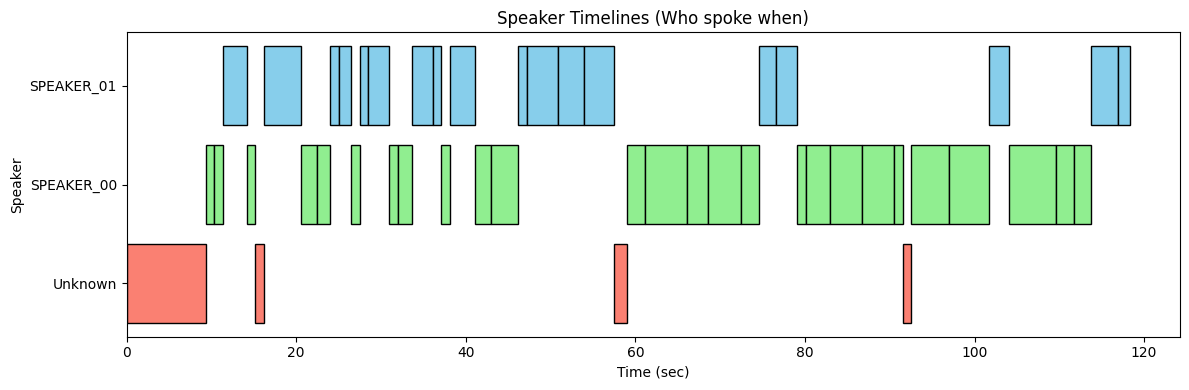

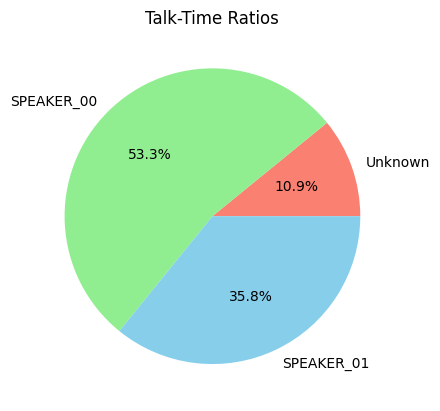

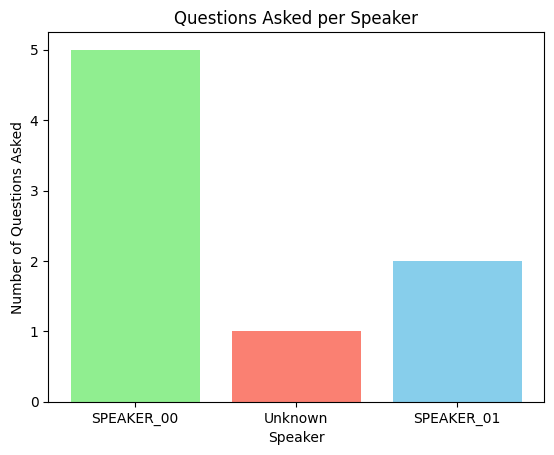

In [ ]:
import matplotlib.pyplot as plt

# ---------------------------
# 1. Speaker Timelines (Gantt-style)
# ---------------------------
fig, ax = plt.subplots(figsize=(12, 4))
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'purple']  # assign colors to speakers
speaker_colors = {spk: colors[i % len(colors)] for i, spk in enumerate({utt['speaker'] for utt in utterances})}

for utt in utterances:
    ax.barh(
        utt['speaker'],
        width=utt['end'] - utt['start'],
        left=utt['start'],
        color=speaker_colors[utt['speaker']],
        edgecolor='black'
    )

ax.set_xlabel("Time (sec)")
ax.set_ylabel("Speaker")
ax.set_title("Speaker Timelines (Who spoke when)")
plt.tight_layout()
plt.show()

# ---------------------------
# 2. Talk-Time Ratios (Pie Chart)
# ---------------------------
fig, ax = plt.subplots()
ax.pie(
    list(ratios.values()),
    labels=list(ratios.keys()),
    autopct="%1.1f%%",
    colors=[speaker_colors[spk] for spk in ratios.keys()]
)
ax.set_title("Talk-Time Ratios")
plt.show()

# ---------------------------
# 3. Questions Asked (Bar Chart)
# ---------------------------
fig, ax = plt.subplots()
ax.bar(
    questions.keys(),
    questions.values(),
    color=[speaker_colors[spk] for spk in questions.keys()]
)
ax.set_xlabel("Speaker")
ax.set_ylabel("Number of Questions Asked")
ax.set_title("Questions Asked per Speaker")
plt.show()
